In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mnist = pd.read_csv('total.csv')

(-0.5, 27.5, 27.5, -0.5)

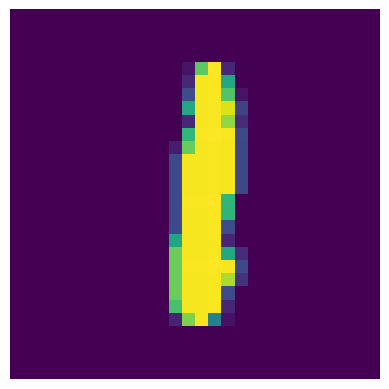

In [9]:
shuffle_index = np.random.permutation(70000)
X=mnist.drop('label',axis=1)
Y=mnist['label']
x_train, x_test, y_train, y_test = X[:60000], X[60000:], Y[:60000].astype(int), Y[60000:].astype(int)
digit = np.array(x_train.iloc[2500])
image = digit.reshape(28, 28)
plt.imshow(image)
plt.axis("off")

In [10]:
y_train[2500]

1

In [11]:
def augment_feature_vector(X):
    return np.hstack((np.ones([len(X), 1]), X))

In [13]:
def naive_compute_probabilities(X, theta):
    #Arguments:
    #X is a (nxd) matrix (numpy array)
    #theta is a kxd matrix
    
    #Returns:
    #H is a (kxn) matrix (numpy array) such that each column of H represents the probabilities that the ith
    #data point takes on each label.
    
    #constructs the skeleton of the output matrix.
    k = theta.shape[0]
    n = X.shape[0]
    H = np.zeros([k,n])

     #loops over all the data points
    for i in range(n):
        dpoint = X[i]
        #constructing a vector that we can take a maximum of to obtain constant c
        c_vector = np.zeros(k)
        for j in range(k):
            c_vector[j] = (np.dot(theta[j], dpoint))
            c = np.amax(c_vector)
        summation = 0
        
        #for each data point we loop through all of the labels
        for j in range(k): 
            exponent = np.dot(theta[j], dpoint) - c
            summation += np.exp(exponent)
            H[j][i] = np.exp(exponent)

        H[:,i] = H[:,i]/summation

    return H

In [15]:
import time
 #theta initialized to zero
theta = np.zeros([10, x_train.shape[1]])

start = time.time()
probs = naive_compute_probabilities(x_train.to_numpy(), theta)
end = time.time()
end - start

12.169336318969727

In [17]:
#theta randomly initialized
theta = np.random.randint(0, 10, [10,x_train.shape[1]])

start = time.time()
probs = naive_compute_probabilities(x_train.to_numpy(), theta)
end = time.time()
end - start

16.36603093147278

In [18]:
a = np.array([1,2,3,4,5])
b = np.array([8,8,8,8,8])

a_dot_b = sum([a[i]*b[i] for i in range(len(a))])
a_dot_b

120

In [19]:
np.dot(a,b)

120

In [20]:
def vectorized_compute_probabilities(X, theta):
    #Arguments:
    #X is a (nxd) matrix (numpy array)
    #theta is a kxd matrix
    
    #Returns:
    #H - a (kxn) matrix (numpy array) such that each column of H represents the probabilities that the ith
    #data point takes on each label.
    
    theta_XT = np.matmul(theta, np.transpose(X))
    #taking a columnwise max:
    c = np.amax(theta_XT, axis = 0)
    #elementwise exponentiation of theta_XT:
    exp_matrix = np.exp(theta_XT - c)
    #computing the normalization factors for each column of H:
    sum_vector = np.sum(exp_matrix, axis = 0)
    
    #broadcasting!
    return exp_matrix/sum_vector

In [21]:
theta = np.zeros([10, x_train.shape[1]])

start = time.time()
probs = vectorized_compute_probabilities(x_train.to_numpy(), theta)
end = time.time()
end - start

1.4125423431396484

In [23]:
theta = np.random.randint(0, 10, [10, x_train.shape[1]])

start = time.time()
probs = vectorized_compute_probabilities(x_train.to_numpy(), theta)
end = time.time()
end - start

0.9314146041870117

In [24]:
import scipy.sparse as sparse

def gradient_descent_iteration(X, Y, theta, alpha, lambda_factor):
    
    n = len(Y)
    k = theta.shape[0]
    data = [1]*n
    
    H = vectorized_compute_probabilities(X, theta)
    #more efficient way to implement large sparse arrays:
    M = sparse.coo_matrix((data, (Y, range(n))), shape=(k,n)).toarray()
    
    first_term = np.matmul(M-H, X)*(-1/n)
    second_term = lambda_factor * theta

    return theta - alpha * (first_term + second_term)

In [25]:
def predict(X, theta):

    X = augment_feature_vector(X)
    probabilities = vectorized_compute_probabilities(X, theta)
    return np.argmax(probabilities, axis = 0)

In [26]:
def compute_accuracy(X, Y, theta):
    predictions = predict(X, theta)
    return np.mean(predictions == Y)

In [27]:
def softmax_regression(X, Y, alpha, lambda_factor, k, num_iterations):   
    
    X = augment_feature_vector(X)
    theta = np.zeros([k, X.shape[1]])
    for i in range(num_iterations):
        theta = gradient_descent_iteration(X, Y, theta, alpha, lambda_factor)
    
    return theta

In [28]:
#using parameters suggested in prompt for original project but extending number of iterations of gradient
#descent to 1000 instead of 150

theta_final = softmax_regression(x_train, y_train, alpha = .3, 
                           lambda_factor = 1.0e-4, k = 10, num_iterations = 1000)

In [29]:
#accuracy on test set

compute_accuracy(x_test, y_test, theta_final)

1.0